# Packet Queuing and Dropping in Router (40634-1 Sharif UT, Spring 2023)
Course Info: **Computer Simulation, 40634-1 SUT** ([course page](https://docs.ce.sharif.edu/%D8%AF%D8%B1%D8%B3/%DB%B4%DB%B0%DB%B6%DB%B3%DB%B4))\
<b>Course Project</b>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<b>تهیه و تدوین</b>
<br>
مهدی جعفری (98109612)
<br>
    اشکان خادمیان (98105738)
</div>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=5>
<p></p>
<b>نطق ۱: مستندات کد</b>
</font>
<hr>
<li>
ماژول
<code>packet</code>:
این ماژول کلاس <code>packet</code> را پیاده می‌کند که تنها وظیفه نگه‌داری جزئیات یک <code>packet</code> مثل زمان ورود، اولویت و ... است.
</li>
<li>
ماژول <code>customqueue</code>: در این ماژول کلاس‌های انواع صف‌ها پیاده شده‌است که به شرح زیرند:
    <ul>
    <li><code>AbstractQueue</code>: کلاس پایه برای صف‌ها</li>
    <li><code>FIFOQueue</code>: کلاس یک صف عادی FIFO. برای پیاده‌سازی این کلاس از یک <code>deque</code> استفاده می‌کنیم و تسک‌ها را به ترتیب اضافه شدن در آن می‌ریزیم و برای <code>pop</code> از ابتدای این <code>deque</code> برمیداریم.</li>
    <li><code>WRRQueue</code>: این کلاس برای پیاده‌سازی Weighted Round Robin می‌باشد. در آن ۳ صف <code>FIFOQueue</code> و وزن‌های هرکدام را نگه می‌داریم و در زمان اضافه‌شدن با توجه به اولویت پکت، در صف متناظرش آن را اضافه می‌کنیم. در زمان <code>pop</code> با توجه به وزن‌ها به ترتیب از هر صف <code>pop</code> می‌کنیم.</li>
    <li><code>NPPSQueue</code>: در این کلاس صف اولویت‌دار را پیاده می‌کنیم. یک لیست نگه می‌داریم که در آن پکت‌ها به ترتیب اولویت نزولی هستند. در زمان اضافه شدن این ترتیب را حفظ می‌کنیم و در زمان <code>pop</code> از ابتدای این لیست برمی‌داریم.</li>
    </ul>
</li>
<li>
ماژول <code>scheduler</code>: این ماژول کلاس اصلی <code>Scheduler</code> را پیاده می‌کند. این کلاس متغیرهای سیستم را ورودی می‌گیرد و سپس شبیه‌سازی را انجام می‌دهد. در این ماژول همچنین دو کلاس <code>Event</code و <code>EventSet</code> نیز پیاده شده‌اند که کلاس اول نشان‌دهنده یک اتفاق (ورود به سیستم، خروج از سیستم) برای یک پکت است و کلاس دوم وظیفه مرتب نگه‌داشتن تمام <code>Event</code> را دارد. در <code>Scheduler</code>، <code>Event</code>ها ساخته می‌شوند و در <code>EventSet</code> ریخته می‌شوند تا فرآیند شبیه‌سازی انجام گیرد.
</li>
<li>
ماژول <code>stats</code>: این ماژول کلاس لازم برای تولید مقادیر آماری روی یک <code>Scheduler</code> را داراست.
در واقع با این ماژول رفتار و عملیات مورد نیاز برای تولید مقادیر آماری در طی روشن بودن شبیه‌ساز از کلاس <code>Scheduler</code> به کلاس <code>SchedulerStats</code> تفویض شده است.
</li>
<li>
ماژول <code>queue_observer</code>: این ماژول یک <a href="https://en.wikipedia.org/wiki/Observer_pattern">observer</a> روی ماژول <code>customqueue</code> می‌باشد. مقادیر مختلفی که توسط این ماژول observer نگاه داشته می‌شوند بعدتر در ماژول <code>stats</code> به منظور تولید لاگ یا نمودار استفاده خواهند شد.
    <ul>
    <li><code>QueueObserver</code>: اینترفیس برای observe کردنِ صف‌ها</li>
    <li><code>QueueHistoryObserver</code>: این observer تمامی بسته‌هایی که زمانی وارد یک صف می‌شوند را نگهداری می‌کند (حتی اگر در نهایت این بسته‌ها از صف برداشته شوند)</li>
    <li><code>QueueLengthObserver</code>: این observer طول صف را مدت زمان شبیه‌سازی مانیتور می‌کند.</li>
    </ul>
</li>
</ul>
</div>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=5>
<p></p>
<b>نطق ۲: راه‌اندازی</b>
</font>
<hr>
در ادامه ابتدا import های لازم صورت می‌گیرد سپس پارامتر‌های ورودی مساله قرار گرفته‌اند. با تغییر این پارامتر‌ها خروجی‌های متنوع حاصل خواهد شد.
</div>

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from customqueue import WRRQueue, FIFOQueue, NPPSQueue
from scheduler import Scheduler
from stats import SchedulerStats
from queue_observer import QueueHistoryObserver, QueueLengthObserver

In [42]:
# Parameters
X = 2
Y = 1.5
T = 30
PROCESSORS_NUM = 1
LENGTH_LIMIT = [10, 15, 11]  # first is for lowest priority queue
WRR_WEIGHTS = [1, 2, 3]  # first is for lowest priority queue
PRIORITY_PROBS = [0.5, 0.3, 0.2]

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=5>
<p></p>
<b>نطق ۳: شبیه‌سازی</b>
</font>
<hr>
در ادامه در سه زیربخش هر یک از صف‌های Weighted Round Robin، FIFO و Non-Preemptive Priority Scheduling راه اندازه و خروجی حاصل از شبیه‌سازی هر کدام نمایش داده می‌شود.
در مورد لاگ‌های هر مورد باید موارد زیر را خاطر نشان کرد.
<br>
ابتدا میانگین زمانی دراز مدت طول هر صف به ترتیب نمایش داده می‌شود. برای سیستم‌هایی که تنها یک صف دارند (حالت FIFO و NPPS) تنها میانگین یک صف نمای شداده می‌شود. سپس به ترتیب میانگین زمان انتظار در کل صف‌ها و در هر یک از صف‌ها لاگ می‌شود.
سپس برای هر یک از پردازنده‌ها (ممکن است تنها یک پردازنده موجود باشد) نرخ بهره‌وری (ρ) نمایش داده می‌شود.
و در آخر تعداد بسته‌های دراپ شده نمایش داده می‌شود.
</div>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=4>
<p></p>
<b>نطق ۳.۱: Weighted Round Robin Queue</b>
</font>
</div>

Long-time-average of queue lengths
--------------------------
	L_Q for (FIFO Queue: Size = 10): 4.956812407045688
	L_Q for (FIFO Queue: Size = 15): 0.6378305461707025
	L_Q for (FIFO Queue: Size = 11): 0.4653823444960069
Average waiting time in all queues = 4.04011264789987
Average waiting time in each queue:
--------------------------
	W_Q for (FIFO Queue: Size = 10): 6.421427387941407
	W_Q for (FIFO Queue: Size = 15): 1.484639398519527
	W_Q for (FIFO Queue: Size = 11): 1.0628674935131082
Processors utilizations
--------------------------
processor #1: ρ = 0.8941733894423056
Packets Status
#Dropped packets = 8
#Processed packets  = 44
#Ended up in queue packets  = 13


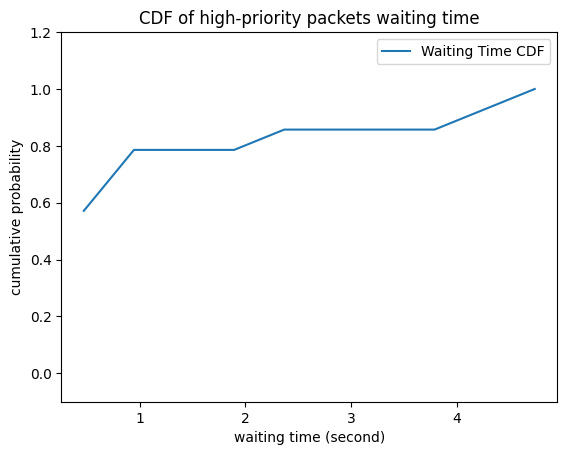

In [43]:
queues = [FIFOQueue(l) for l in LENGTH_LIMIT]
for q in queues:
    q.register_observer([QueueHistoryObserver(), QueueLengthObserver()])

scheduler = Scheduler(
    queue=WRRQueue(
        queues=queues,
        weights=WRR_WEIGHTS,
    ),
    x=X,
    y=Y,
    t=T,
    processors=PROCESSORS_NUM,
    priority_probs=PRIORITY_PROBS,
)
scheduler.run()
SchedulerStats(scheduler).configured_log()

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=4>
<p></p>
<b>نطق ۳.۲: FIFO Queue</b>
</font>
</div>

Long-time-average of queue lengths
--------------------------
	L_Q for (FIFO Queue: Size = 10): 7.406619270535606
Average waiting time in all queues = 6.25233143466039
Average waiting time in each queue:
--------------------------
	W_Q for (FIFO Queue: Size = 10): 4.484575536285384
Processors utilizations
--------------------------
processor #1: ρ = 0.9358968034569092
Packets Status
#Dropped packets = 24
#Processed packets  = 41
#Ended up in queue packets  = 10


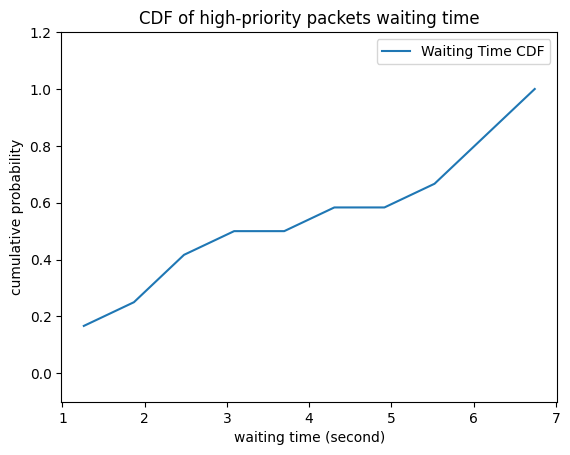

In [47]:
queue = FIFOQueue(length_limit=LENGTH_LIMIT[0])
queue.register_observer([QueueHistoryObserver(), QueueLengthObserver()])
scheduler = Scheduler(
    queue=queue,
    x=X,
    y=Y,
    t=T,
    processors=PROCESSORS_NUM,
    priority_probs=PRIORITY_PROBS,
)
scheduler.run()
SchedulerStats(scheduler).configured_log()

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=4>
<p></p>
<b>نطق ۳.۳: Non-Preemptive Priority Scheduling Queue</b>
</font>
</div>

Long-time-average of queue lengths
--------------------------
	L_Q for (Non-preemptive Priority Scheduling Queue: Size=10): 6.166029456183116
Average waiting time in all queues = 4.614550918909546
Average waiting time in each queue:
--------------------------
	W_Q for (Non-preemptive Priority Scheduling Queue: Size=10): 3.5103059301801722
Processors utilizations
--------------------------
processor #1: ρ = 0.9274783508926011
Packets Status
#Dropped packets = 10
#Processed packets  = 44
#Ended up in queue packets  = 9


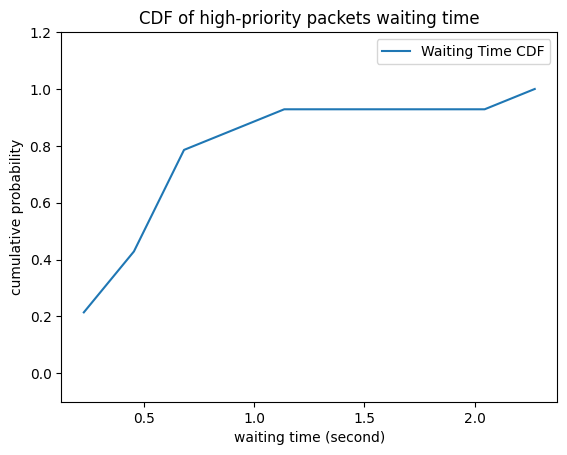

In [45]:
queue = NPPSQueue(length_limit=LENGTH_LIMIT[0])
queue.register_observer([QueueHistoryObserver(), QueueLengthObserver()])
scheduler = Scheduler(
    queue=queue,
    x=X,
    y=Y,
    t=T,
    processors=PROCESSORS_NUM,
    priority_probs=PRIORITY_PROBS,
)
scheduler.run()
SchedulerStats(scheduler).configured_log()

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=5>
<p></p>
<b>نطق ۴: سوالات</b>
</font>
<hr>
در ادامه دو سوال زیر را درباره نتایج بدست آمده پاسخ می‌دهیم.
</div>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=4>
<p></p>
<b>نطق ۴.۱: افزایش بهره‌وری سیستم</b>
</font>
<br>
افزایش بهره‌وری سیستم معمولا با هدف کاهش هزینه‌های سیستم انجام می‌شود. به این صورت که مدیر یک سامانه سعی میکند تعداد پردازنده‌های سیستم را به حداقل مورد نیاز برساند.
<br>
هر چه تعداد پردازنده‌ها کمتر باشند بالطبع بهره‌وری هر کدام از پردازنده‌ها بالاتر خواهد رفت ولی از آن صف زودتر پر شده و احتمال Drop شدن بسته‌ها بالا می‌رود.
از طرف دیگر اگر تعداد پردازنده‌ها خیلی زیاد باشد صف معمولا خالی و تعداد زیادی از پردازنده‌ها بیکار خواهند بود.
به این ترتیب یک مصالحه شکل می‌گیرد و در این مصالحه باید مقدار زیر را بالا نگه داشت.
</div>
$$\rho=\frac{\lambda}{n\times \mu}$$
<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
که در آن n تعداد پردازنده‌ها، µ نرخ پردازش هر پردازنده و λ نرخ تولید بسته می‌باشد.\
لازم به ذکر است این مقدار نباید بیشتر از یک هم شود چرا که به معنای Drop شدن بسته‌ها خواهد بود.
</div>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=4>
<p></p>
<b>نطق ۴.۲: انتخاب سیاست مناسب</b>
</font>
<br>
به ازای ورودی‌های یکسان مشاهده می‌شود:
سیستم با صف WRR نزدیک به ۱۲ درصد بسته‌ها را Drop می‌کند.
سیستم با صف FIFO نزدیک به ۳۲ درصد بسته‌ها را Drop می‌کند.
سیستم با صف NPPS نزدیک به ۱۵ درصد بسته‌ها را Drop می‌کند.
<br>
این بررسی موردی نشان می‌دهد احتمالا انتخاب صف FIFO برای این روتر مناسب نبوده و شاید استفاده از یک صف WRR یا NPPS مناسبت‌تر باشد.
<br>
از طرفی اگر برایمان رسیدن هر چه سریع‌ترِ بسته‌های با اولویت بالا مهم است باید از صف‌های WRR و NPPS استفاده کنیم.
چرا که با نظر به نمودار CDF مربوط به زمان انتظار در صف برای بسته‌های با اولویت بالا، مشاهده می‌شود بسته‌های در سیستم با صف NPPS با احتمال بیش از ۹۵ درصد کمتر از یک ثانیه در صف منتظر می‌مانند و در سیستم با صف WRR با احتمال بیش از ۹۵ درصد کمتر از ۳ ثانیه در منتظر می‌ماند.
این عدد در مورد صف FIFO برای احتمال بیش از ۹۵ درصد برابر عددی بین ۶ تا ۷ ثانیه است.
</div>